In [18]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torch import nn
import torchvision
from IPython.display import display

In [19]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [20]:
bird_image = Image.open("D:\School\Applied ML FSU\Applied-ML-FSU\Data/bird038.png").convert("L")
tensor = torchvision.transforms.ToTensor()
bird_tensor = tensor(bird_image)
bird = bird_tensor.flatten()
bscaler = StandardScaler(with_std = False)
sbird = bscaler.fit_transform(bird.reshape(-1,1))
sbird = torch.tensor(sbird).squeeze().float().to(device)

height, width = bird_tensor.squeeze().shape
coordinates = torch.tensor([(x,y) for x in range(height) for y in range(width)])
cscaler = StandardScaler()
scoordinates = cscaler.fit_transform(coordinates)
scoordinates = torch.tensor(scoordinates).float().to(device)

bird_coordinate = list(zip(scoordinates, sbird))
dataloader = torch.utils.data.DataLoader(bird_coordinate, batch_size = 64,shuffle = True)

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\evans\AppData\Local\Temp\ipykernel_42900\115235622.py:1: SyntaxWarning: invalid escape sequence '\S'
  bird_image = Image.open("D:\School\Applied ML FSU\Applied-ML-FSU\Data/bird038.png").convert("L")


In [21]:
#https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [22]:
epochs = 300

In [23]:
neural_net = NeuralNetwork().to(device)
optimizer = torch.optim.SGD(neural_net.parameters(), lr = 0.003)
loss_fn = torch.nn.MSELoss()
scheduler = torch.torch.optim.lr_scheduler.StepLR(optimizer, step_size = 100, gamma = 0.5)

losses = []
torch.autograd.set_detect_anomaly(True)
for epoch in range(epochs):
    data_size = len(dataloader.dataset)
    for batch, (X,y) in enumerate(dataloader):
        pred = neural_net(X).squeeze()
        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    losses.append(loss.item())

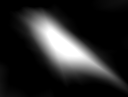

In [24]:
with torch.no_grad():
            std_intensities = neural_net(scoordinates).cpu()
            intensities =  np.clip(bscaler.inverse_transform(std_intensities), 0., 1.)
            intensities =  (intensities*255).astype(np.uint8)
            reconstructed = Image.fromarray(intensities.reshape(height, width))
display(reconstructed)

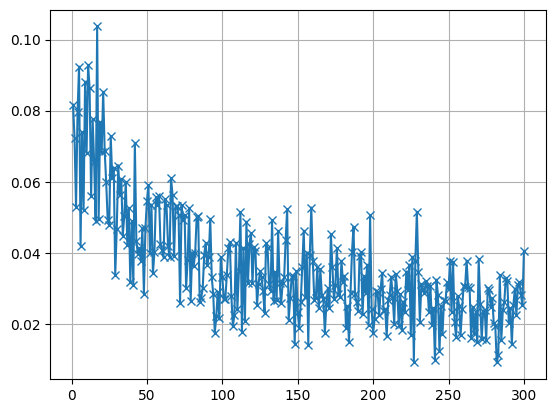

In [25]:
plt.plot(range(1,epochs + 1), losses, marker = 'x')
plt.grid()

# (b)

In [26]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, 32),
            nn.ReLU(),
            nn.Linear(32, 128),
            nn.ReLU(),
            nn.Linear(128,1)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [27]:
neural_net = NeuralNetwork().to(device)
optimizer = torch.optim.SGD(neural_net.parameters(), lr = 0.003)
loss_fn = torch.nn.MSELoss()
scheduler = torch.torch.optim.lr_scheduler.StepLR(optimizer, step_size = 100, gamma = 0.5)

losses = []
torch.autograd.set_detect_anomaly(True)
for epoch in range(epochs):
    data_size = len(dataloader.dataset)
    for batch, (X,y) in enumerate(dataloader):
        pred = neural_net(X).squeeze()
        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    losses.append(loss.item())

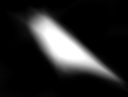

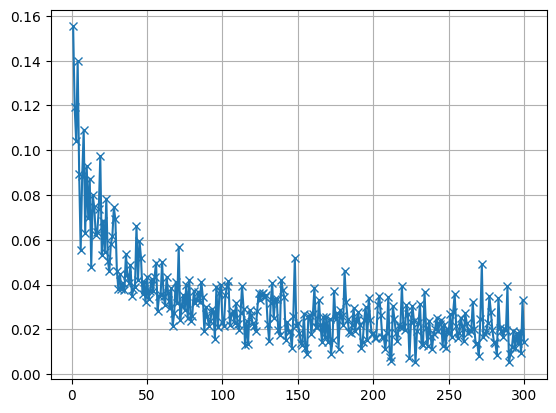

In [28]:
with torch.no_grad():
            std_intensities = neural_net(scoordinates).cpu()
            intensities =  np.clip(bscaler.inverse_transform(std_intensities), 0., 1.)
            intensities =  (intensities*255).astype(np.uint8)
            reconstructed = Image.fromarray(intensities.reshape(height, width))
display(reconstructed)
plt.plot(range(1,epochs + 1), losses, marker = 'x')
plt.grid()

# (c)

In [29]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2,32),
            nn.ReLU(),
            nn.Linear(32,64),
            nn.ReLU(),
            nn.Linear(64,128),
            nn.ReLU(),
            nn.Linear(128,1)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [30]:
neural_net = NeuralNetwork().to(device)
optimizer = torch.optim.SGD(neural_net.parameters(), lr = 0.003)
loss_fn = torch.nn.MSELoss()
scheduler = torch.torch.optim.lr_scheduler.StepLR(optimizer, step_size = 100, gamma = 0.5)

losses = []
torch.autograd.set_detect_anomaly(True)
for epoch in range(epochs):
    data_size = len(dataloader.dataset)
    for batch, (X,y) in enumerate(dataloader):
        pred = neural_net(X).squeeze()
        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    losses.append(loss.item())

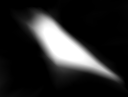

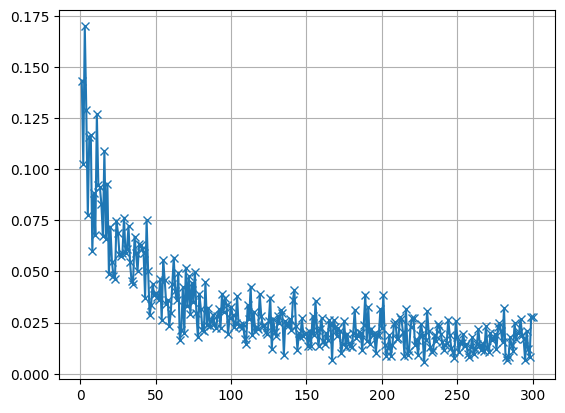

In [31]:
with torch.no_grad():
            std_intensities = neural_net(scoordinates).cpu()
            intensities =  np.clip(bscaler.inverse_transform(std_intensities), 0., 1.)
            intensities =  (intensities*255).astype(np.uint8)
            reconstructed = Image.fromarray(intensities.reshape(height, width))
display(reconstructed)
plt.plot(range(1,epochs + 1), losses, marker = 'x')
plt.grid()

# (d)

In [32]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2,32),
            nn.ReLU(),
            nn.Linear(32,64),
            nn.ReLU(),
            nn.Linear(64,128),
            nn.ReLU(),
            nn.Linear(128,128),
            nn.ReLU(),
            nn.Linear(128,1)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [33]:
neural_net = NeuralNetwork().to(device)
optimizer = torch.optim.SGD(neural_net.parameters(), lr = 0.003)
loss_fn = torch.nn.MSELoss()
scheduler = torch.torch.optim.lr_scheduler.StepLR(optimizer, step_size = 100, gamma = 0.5)

losses = []
torch.autograd.set_detect_anomaly(True)
for epoch in range(epochs):
    data_size = len(dataloader.dataset)
    for batch, (X,y) in enumerate(dataloader):
        pred = neural_net(X).squeeze()
        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    losses.append(loss.item())

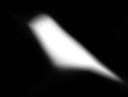

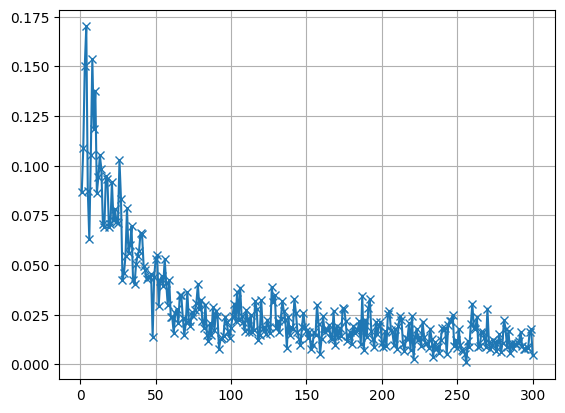

In [34]:
with torch.no_grad():
            std_intensities = neural_net(scoordinates).cpu()
            intensities =  np.clip(bscaler.inverse_transform(std_intensities), 0., 1.)
            intensities =  (intensities*255).astype(np.uint8)
            reconstructed = Image.fromarray(intensities.reshape(height, width))
display(reconstructed)
plt.plot(range(1,epochs + 1), losses, marker = 'x')
plt.grid()